In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
results = pd.read_csv("../data/events/all-events-autumn-2023.csv", dtype={"EventCode": 'str',
                                                                   "EventBaseCode": 'str',})

In [15]:
results.isnull().sum()/results.shape[0]

GLOBALEVENTID        0.000000e+00
SQLDATE              0.000000e+00
Actor1Code           0.000000e+00
Actor1Name           7.304134e-07
Actor1CountryCode    0.000000e+00
Actor1Type1Code      8.152711e-01
Actor1Type2Code      9.863118e-01
Actor2Code           0.000000e+00
Actor2Name           7.304134e-07
Actor2CountryCode    0.000000e+00
Actor2Type1Code      8.347992e-01
Actor2Type1Code_1    8.347992e-01
EventCode            0.000000e+00
EventBaseCode        0.000000e+00
GoldsteinScale       2.434711e-06
NumMentions          0.000000e+00
AvgTone              0.000000e+00
SOURCEURL            1.460827e-06
dtype: float64

In [60]:
results.head()

,GLOBALEVENTID,SQLDATE,Actor1Code,Actor1Name,Actor1CountryCode,Actor1Type1Code,Actor1Type2Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2Type1Code,Actor2Type1Code_1,EventCode,EventBaseCode,GoldsteinScale,NumMentions,AvgTone,SOURCEURL
0,1147848066,20231122,CHNGOV,CHINA,CHN,GOV,NaN,USAGOV,JOE BIDEN,USA,GOV,GOV,044,044,2.5,2,-1.412429,https://www.firstpost.com/world/china-determin...
1,1147848076,20231122,USAGOV,JOE BIDEN,USA,GOV,NaN,CHN,CHINESE,CHN,NaN,NaN,044,044,2.5,2,-1.412429,https://www.firstpost.com/world/china-determin...
2,1143689750,20231130,GRDGOVMED,BRIAN MC,GRD,GOV,MED,IRL,IRELAND,IRL,NaN,NaN,1822,182,-9.0,1,-10.288809,https://www.irishtimes.com/crime-law/courts/20...
3,1147667008,20231121,QAT,QATAR,QAT,NaN,NaN,ISR,ISRAEL,ISR,NaN,NaN,045,045,5.0,1,-0.213220,https://www.thejc.com/news/uk/david-cameron-vi...
4,1147744830,20231122,USA,WASHINGTON,USA,NaN,NaN,TURGOV,ISTANBUL,TUR,GOV,GOV,075,075,7.0,6,-3.016591,https://www.nytimes.com/2023/12/21/us/politics...


In [61]:
def create_pair(x):
  return "-".join(x[["Actor1CountryCode", "Actor2CountryCode"]].sort_values().tolist())

In [62]:
results["Actors_pair"] = results["Actor1CountryCode"] + "-" + results["Actor2CountryCode"]

In [63]:
results.head()

,GLOBALEVENTID,SQLDATE,Actor1Code,Actor1Name,Actor1CountryCode,Actor1Type1Code,Actor1Type2Code,Actor2Code,Actor2Name,Actor2CountryCode,Actor2Type1Code,Actor2Type1Code_1,EventCode,EventBaseCode,GoldsteinScale,NumMentions,AvgTone,SOURCEURL,Actors_pair
0,1147848066,20231122,CHNGOV,CHINA,CHN,GOV,NaN,USAGOV,JOE BIDEN,USA,GOV,GOV,044,044,2.5,2,-1.412429,https://www.firstpost.com/world/china-determin...,CHN-USA
1,1147848076,20231122,USAGOV,JOE BIDEN,USA,GOV,NaN,CHN,CHINESE,CHN,NaN,NaN,044,044,2.5,2,-1.412429,https://www.firstpost.com/world/china-determin...,USA-CHN
2,1143689750,20231130,GRDGOVMED,BRIAN MC,GRD,GOV,MED,IRL,IRELAND,IRL,NaN,NaN,1822,182,-9.0,1,-10.288809,https://www.irishtimes.com/crime-law/courts/20...,GRD-IRL
3,1147667008,20231121,QAT,QATAR,QAT,NaN,NaN,ISR,ISRAEL,ISR,NaN,NaN,045,045,5.0,1,-0.213220,https://www.thejc.com/news/uk/david-cameron-vi...,QAT-ISR
4,1147744830,20231122,USA,WASHINGTON,USA,NaN,NaN,TURGOV,ISTANBUL,TUR,GOV,GOV,075,075,7.0,6,-3.016591,https://www.nytimes.com/2023/12/21/us/politics...,USA-TUR


In [64]:
print(
    "Country present in Actor1CountryCode, not in Actor2CountryCode: {}\nCountry present in Actor2CountryCode, not in Actor1CountryCode: {}".format(
        set(results.Actor1CountryCode.value_counts().index.tolist()) - set(results.Actor2CountryCode.value_counts().index.tolist()),
        set(results.Actor2CountryCode.value_counts().index.tolist()) - set(results.Actor1CountryCode.value_counts().index.tolist())
    ))

# "ROM" is Romania
# "NAF" is not a country code, we handle this in a bit

Country present in Actor1CountryCode, not in Actor2CountryCode: set()
Country present in Actor2CountryCode, not in Actor1CountryCode: {'NAF'}


In [66]:
grouped = results.groupby(
    by=["Actors_pair"]
)["GLOBALEVENTID"].count().sort_values(ascending=False)

In [67]:
grouped

Actors_pair
ISR-PSE    183596
PSE-ISR    168282
RUS-UKR    104855
UKR-RUS     88954
USA-ISR     77409
            ...  
SEA-DNK         1
JOR-TKM         1
SEA-CRI         1
JOR-TGO         1
PGS-CZE         1
Name: GLOBALEVENTID, Length: 21373, dtype: int64

In [68]:
print("""Number of all possible unique pairs of countries:
""")
results.Actor1CountryCode.nunique() * (results.Actor2CountryCode.nunique() - 1)

Number of all possible unique pairs of countries:



47961

In [69]:
print("""Number of pairs actually present in the data:
""")
grouped.shape[0]

Number of pairs actually present in the data:



21373

In [70]:
network = pd.DataFrame()
network[["Actor1CountryCode", "Actor2CountryCode"]] = grouped.reset_index()["Actors_pair"].str.split("-", expand=True)
network["count"] = grouped.values
network["Actors_pair"] = network.apply(create_pair, axis=1)

In [71]:
# remove entries where Actor1CountryCode or Actor2CountryCode is not a country code (e.g. "EUR")
from helper import clean_countries

countries = clean_countries(
    set(network["Actor1CountryCode"]).union(network["Actor2CountryCode"])
    )

old_size = network.shape[0]
network = network[np.isin(
    network[["Actor1CountryCode", "Actor2CountryCode"]], list(countries)
    ).all(axis=1)]
new_size = network.shape[0]

print(f"Ratio of rows removed: {(old_size - new_size)/old_size:.2f}")

Ratio of rows removed: 0.10


In [72]:
merged = network.groupby(
    by=["Actors_pair"]
)["count"].sum().sort_values(ascending=False)

In [73]:
network_undirected = pd.DataFrame()
network_undirected[["Source", "Target"]] = merged.reset_index()["Actors_pair"].str.split("-", expand=True)
network_undirected["count"], network_undirected["Type"] = merged.values, "Undirected"
network_undirected["Weight"] = network_undirected["count"].apply(lambda x: x / network_undirected["count"].sum())

In [74]:
network_undirected.head()

,Source,Target,count,Type,Weight
0,ISR,PSE,351878,Undirected,0.093146
1,RUS,UKR,193809,Undirected,0.051303
2,ISR,USA,125531,Undirected,0.033229
3,PSE,USA,63790,Undirected,0.016886
4,CHN,USA,62453,Undirected,0.016532


In [75]:
# create a unique name for the dataset
# which is then used to create a network
# network file can be mapped to the data set by job_id and preprocess_number

#preprocess_number = "1"
#network_undirected.to_csv(f"{job_id}_{preprocess_number}_cooccurence_network.csv", index=False)

# Which events are most frequent?

In [76]:
# remove entries where Actor1CountryCode or Actor2CountryCode is not a country code (e.g. "EUR")

countries = clean_countries(
    set(results["Actor1CountryCode"]).union(results["Actor2CountryCode"])
    )
old_size = results.shape[0]
df_countries = results[np.isin(
    results[["Actor1CountryCode", "Actor2CountryCode"]], list(countries)
    ).all(axis=1)]
new_size = df_countries.shape[0]

print(f"Ratio of rows removed: {(old_size - new_size)/old_size:.2f}")

Ratio of rows removed: 0.08


In [78]:
def plot_event_shares(time_period, code_meanings=None):

    # plot the most frequent types of events in a given time period

    df_time_period = df_countries[df_countries["SQLDATE"].astype("str").str.contains(time_period, regex=False)]
    data2plot = df_time_period["EventCode"].value_counts(sort=True, normalize=True)[:15]
    sns.barplot(data2plot, order=data2plot.index)
    plt.title(f"Most frequent events during {time_period}")
    print(code_meanings)


    042: Make a visit
    043: Host a visit
    040: Consult, not specified below
    051: Praise or endorse
    190: Use conventional military force, not specified below
    


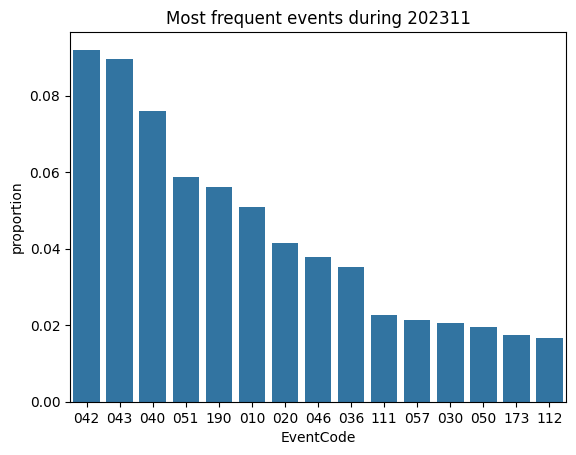

In [79]:
code_meanings = """
    042: Make a visit
    043: Host a visit
    040: Consult, not specified below
    051: Praise or endorse
    190: Use conventional military force, not specified below
    """

plot_event_shares(time_period="202311", code_meanings=code_meanings)


    042: Make a visit
    043: Host a visit
    040: Consult, not specified below
    051: Praise or endorse
    190: Use conventional military force, not specified below
    


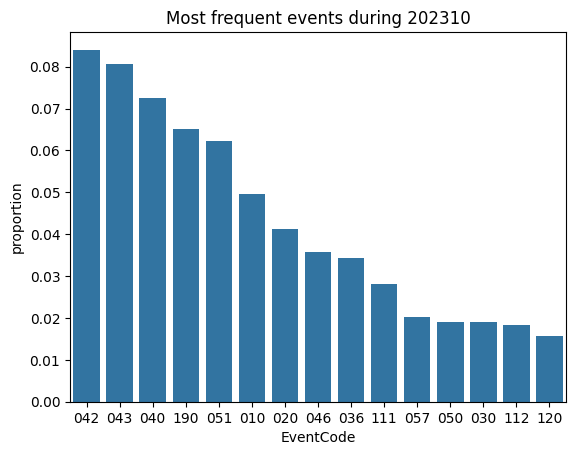

In [80]:
code_meanings = """
    042: Make a visit
    043: Host a visit
    040: Consult, not specified below
    051: Praise or endorse
    190: Use conventional military force, not specified below
    """

plot_event_shares(time_period="202310", code_meanings=code_meanings)

# Spread in tone

In [81]:
MEDIA_COUNTRY_MAPPING = pd.read_csv("../data/media-country_mapping.TXT", sep="\t", names=["Media", "CountryCodeShort", "CountryName"])
COUNTRYCODES = pd.read_csv('../data/countrycodes_extended.csv', skiprows=1, usecols=[0,2], names=["CountryName", "CountryCode"])

In [82]:
# merge two dataframes and fill in missing values
# to map media sources to 3-digit country codes

MEDIA_COUNTRY_CODE_MAPPING = MEDIA_COUNTRY_MAPPING.merge(
    COUNTRYCODES,
    how="left",
    on="CountryName"
).drop_duplicates()

countries_w_empty_codes = dict.fromkeys(
    MEDIA_COUNTRY_CODE_MAPPING[MEDIA_COUNTRY_CODE_MAPPING.CountryCode.isna()]["CountryName"].value_counts().index.tolist()
)

# key in COUNTRYCODES.CountryCode if only one option

for country_name in countries_w_empty_codes.keys():
    filtered = COUNTRYCODES[COUNTRYCODES.CountryName.str.contains(country_name)]
    if filtered.shape[0] == 1:
        countries_w_empty_codes[country_name] = filtered["CountryCode"].values[0]

count = 0
still_empty = []
for country_name, country_code in countries_w_empty_codes.items():
    if country_code == None:
        count += 1
        still_empty.append(country_name)

still_empty_codes = [
    "USA",
    "TUR",
    "CZE",
    "VNM",
    "KOR",
    "SVK",
    "BIH",
    "LAO",
    "CIV",
    "XXK",
    "VAT",
    "MAC",
    "REU",
    "SWZ",
    "VIR",
    "PRK",
    "CCK",
    "CPV",
    "IOT",
    "TLS",
    "PCN",
    "FLK",
    "ANT",
    "ATF",
    None
]

for country_name, country_code in zip(still_empty, still_empty_codes):
    countries_w_empty_codes[country_name] = country_code

MEDIA_COUNTRY_CODE_MAPPING["CountryCode"] = MEDIA_COUNTRY_CODE_MAPPING["CountryCode"].fillna(
    MEDIA_COUNTRY_CODE_MAPPING["CountryName"].map(countries_w_empty_codes)
)

In [83]:
MEDIA_COUNTRY_CODE_MAPPING

,Media,CountryCodeShort,CountryName,CountryCode
0,0-100.it,IT,Italy,ITA
1,0-50.ru,RS,Russia,RUS
2,0-60mag.com,US,United States,USA
3,0-debt.com,US,United States,USA
4,000fff.org,US,United States,USA
...,...,...,...,...
189633,zzp-nederland.nl,NL,Netherlands,NLD
189634,zzpbarometer.nl,NL,Netherlands,NLD
189635,zzpn.gov.cn,CH,China,CHN
189636,zzrednet.cn,CH,China,CHN


In [84]:
# TODO: function to remove rows with non-country actors

In [85]:
import re

def map_media_to_country_origin(df):
    """
    Maps entry of GDELT event table to the country where the media that wrote the article originates from
    and adds new column "CountryOrigin" to the dataframe.

    Details on methodology here: https://blog.gdeltproject.org/mapping-the-media-a-geographic-lookup-of-gdelts-sources/.

    :param df: Sample of GDELT event table as a dataframe including "SOURCEURL" column
    :return: Function performs inplace adding new column to df, see description
    """

    # regex to extract a base URL of the media source
    regex = re.compile(
    "(https:\/\/www\.|http:\/\/www\.|https:\/\/|http:\/\/)?([a-zA-Z0-9\-\_]{2,}(\.[a-zA-Z0-9]{2,})(\.[a-zA-Z0-9]{2,})?)"
    )
    temp = pd.DataFrame()
    temp.loc[:, "Media"] = df["SOURCEURL"].str.extract(regex).iloc[:, 1]
    temp = temp.merge(
        MEDIA_COUNTRY_CODE_MAPPING[["Media", "CountryName", "CountryCode"]],
        how="left",
        on="Media"
    )
    df.loc[:, "CountryOrigin"] = temp.loc[:, "CountryCode"].values
    del temp

In [86]:
data_tone_spread = df_countries.copy()

print("How many missing values in \"CountryOrigin\"?")

# TODO: fix map_media_to_country_origin(df) s.t. it doesn't trigger SettingWithCopyWarning
# for now just disabled warning

pd.options.mode.chained_assignment = None  # Disable the warning
map_media_to_country_origin(data_tone_spread)
pd.options.mode.chained_assignment = 'warn'  # Reset to default

pd.set_option('display.float_format', lambda x: '%.3f' % x)
data_tone_spread.isna().sum() / data_tone_spread.shape[0]

How many missing values in "CountryOrigin"?


GLOBALEVENTID       0.000
SQLDATE             0.000
Actor1Code          0.000
Actor1Name          0.000
Actor1CountryCode   0.000
Actor1Type1Code     0.825
Actor1Type2Code     0.988
Actor2Code          0.000
Actor2Name          0.000
Actor2CountryCode   0.000
Actor2Type1Code     0.843
Actor2Type1Code_1   0.843
EventCode           0.000
EventBaseCode       0.000
GoldsteinScale      0.000
NumMentions         0.000
AvgTone             0.000
SOURCEURL           0.000
Actors_pair         0.000
CountryOrigin       0.129
dtype: float64

In [87]:
countries_of_interest = ["BRA", "RUS", "IND", "CHN", "ZAF", "USA", "DEU", "JPN"]

In [88]:
# TODO: function to plot spread in tone for a given country

time_period = "202310"
country = "RUS"

# drop missing values
data2plot = data_tone_spread.dropna(axis=0, subset="CountryOrigin")

# filter by time period and country
data2plot = data2plot[
    (data2plot["SQLDATE"].astype("str").str.contains(time_period, regex=False)) &\
    (data2plot["CountryOrigin"] == country)
]

In [89]:
# TODO: figure out if we should handle positive tones cancelling negative tones when averaging
# TODO: do we need to add more weight to avg tone of events that have greater count?

data2plot = data2plot.groupby("EventCode")["AvgTone"]\
    .agg(['count', 'mean'])\
    .sort_values(by="count", ascending=False)[:15]

Text(0.5, 1.0, 'Spread in tone: RUS during 202310')

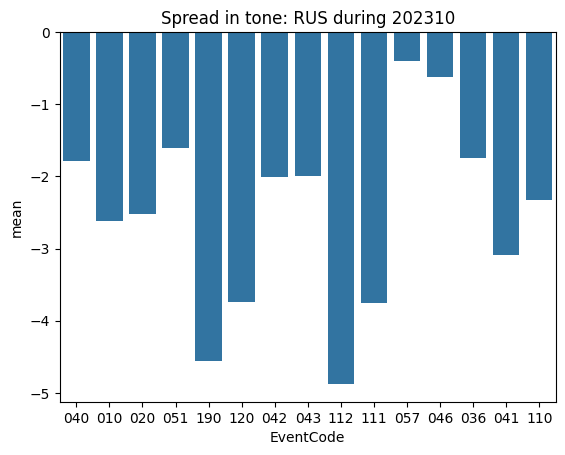

In [90]:
# TODO: do some eventcodes if represented by basecode include other event codes? eg 021 includes 0211 and therefore 021 is more frequent tha 0211
code_meanings = """
    040: Consult, not specified below
    010: Make statement, not specified below
    020: Make an appeal or request, not specified below
    051: Praise or endorse
    190: Use conventional military force, not specified below
    """

sns.barplot(
    data=data2plot,
    x=data2plot.index,
    y="mean"
)
plt.title(f"Spread in tone: {country} during {time_period}")

In [91]:
# TODO: implement function to compare countries' average tone in most frequent (across all countries) events

In [1]:
import pandas as pd
from metrics import betweenness, closeness, eigenvector
from helper import generate_random_color
import matplotlib.pyplot as plt

cooc_edges = pd.read_csv('../out/edges/cooccurrences/edges_undirected_dyn_monthly.csv')
cooc_nodes = pd.read_csv("../out/nodes/cooccurrences/nodes_dyn_monthy.csv")
                 

In [2]:
cooc_nodes.head()

,ID,Label,Latitude,Longitude
0,AFG,Afghanistan,33.0,65.0
1,ALB,Albania,41.0,20.0
2,DZA,Algeria,28.0,3.0
3,AND,Andorra,42.5,1.6
4,AGO,Angola,-12.5,18.5


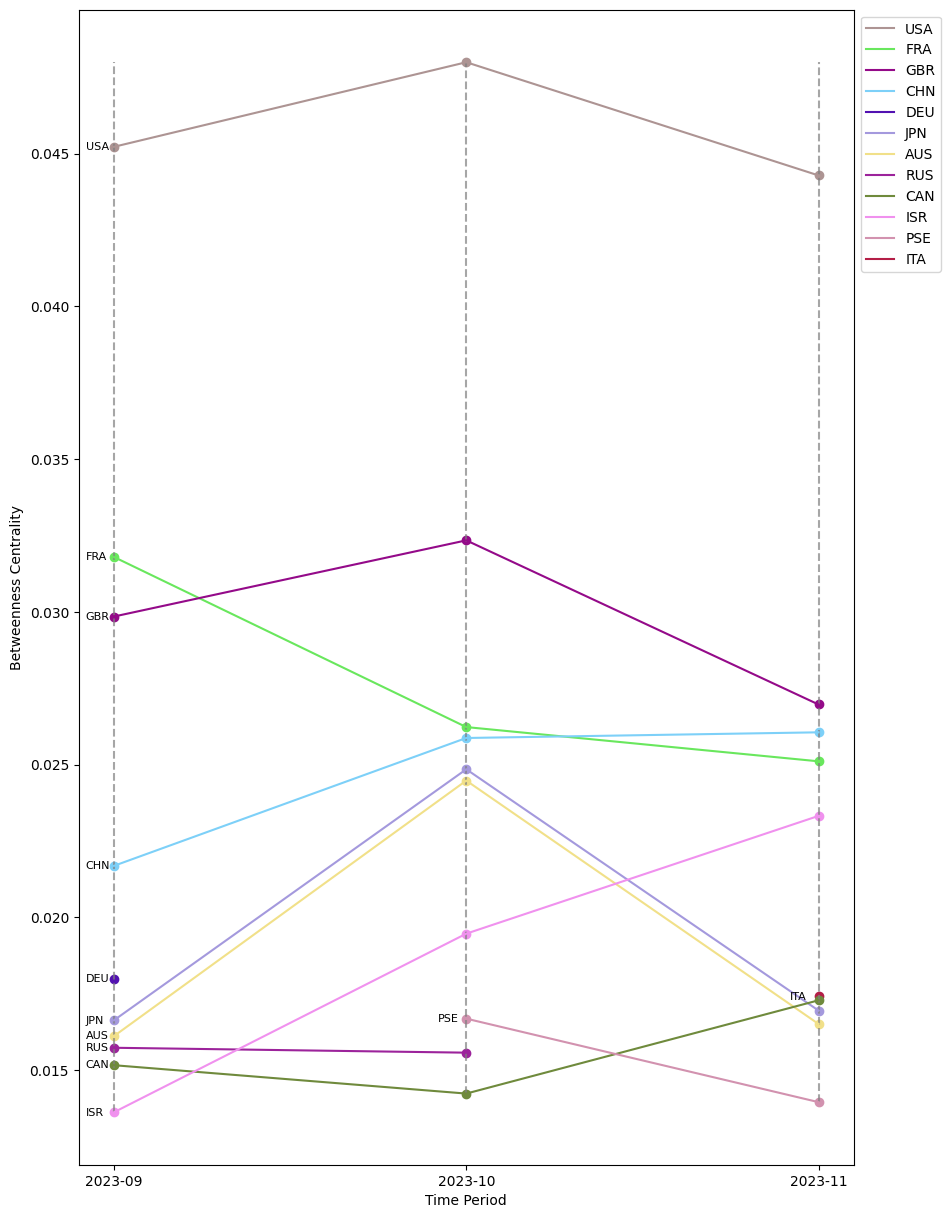

In [3]:
from analysis import *

betweenness_score_dynamic = create_dynamic_centrality_metric_table(
    edges=cooc_edges,
    nodes=cooc_nodes,
    metric_name="BetweennessCentrality",
    metric_func=betweenness
)   
plot_centrality_over_time(betweenness_score_dynamic,
                          plot_top=10,
                          ylabel="Betweenness Centrality",
                          save_path="../out/analysis/temptemp.png")